# A Novel Approach for the Detection of Developing Thunderstorm Cells (Müller et. al, 2019, Remote Sensing)

## 1 Introduction
- new approach for early detection of developing thunderstorms: independent of the estimation of the cloud motion
- usually estimation of cloud updraught strength from cloud cooling rates &rarr; reliable tracking of the cloud fields needed
- challenge: convection 3D &LeftRightArrow; satellite data 2D &rarr; problem under-determined
- approach: derive updraught directly from spatio-temporal gradient of MSG SEVIRI water vapour channels &rarr; **N**ormalised **U**pdraught **S**trength (NUS)
- reduces problem to deriving 1D from 2D information

## 2 Basic Approach for NUS

- vector product of spatio-temoparal gradients of the SEVIRI water vapour channels WV&thinsp;6.2&thinsp;&mu;m and WV&thinsp;7.3&thinsp;&mu;m
- creation of two different time steps 3-component vectors <b><i>&Phi;</i></b><sub>T, 6.2</sub> and <b><i>&Phi;</i></b><sub>7.3</sub> which can be understood as virtual brightness temperature flux with:

$$ \Phi_\mathrm{T, x} = \frac{\frac{\partial}{\partial t \partial x} (T_\mathrm{B} (t,x,y))}{(T_\mathrm{B} (t_0,x,y) - 273K)} \\
\Phi_\mathrm{T, y} = \frac{\frac{\partial}{\partial t \partial y} \left(T_\mathrm{B}(t,x,y)\right)}{(T_\mathrm{B}(t_0,x,y) - 273K)} \\
\Phi_\mathrm{T, z} = \frac{\frac{\partial}{\partial t } (T_\mathrm{B} (t,x,y))}{(T_\mathrm{B} (t_0,x,y) - 273K)}
$$

- then the vector product the vectors <b><i>&Phi;</i></b><sub>T, 6.2</sub> and <b><i>&Phi;</i></b><sub>T, 7.3</sub> gives the normalised updraught strength vector:

$$\overrightarrow{\mathrm{NUSV}} = \Phi_{T, 6.2} \times \Phi_{T, 7.3}$$

- and NUS is the absolute value: 

$$ \overrightarrow{\mathrm{NUS}} = \left| \overrightarrow{\mathrm{NUSV}} \right| = \left|\Phi_{T, 7.3}\right| \cdot \left|\Phi_{T, 6.2}\right| \cdot \sin \alpha $$ 

- NUS allows differentiation of cloud motion: convetion: NUS &Gt; 0, advection NUS &asymp; 0

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

## 3 Why should this work?

- air around clouds usually moist
- signal in water vapour channels usually not disturbed by emission from earth surface
- but horizontal gradients between cloud and atmosphere are decreased by emission from water vapour
- without udraught gradients are smooth &rarr; NUC &asymp; 0
- displacement between cloud top height and water vapour height by updraught &rarr; spatial gradients significantly enhanced &rarr; NUC &Gt; 0
- updraught also increases the temporal gradient

## 4 Examples

- purely advective case

![title](img/nuc_paper_fig3.png)


## 4 Examples

- case with convection 

![title](img/nuc_paper_fig4.png)

## 5 Limitations
- resolution of satellite limits observable movement
- SEVIRI calibration unvertainty for water vapour channels is 0.75&thinsp;K at 250&thinsp;K
- NUS signal often blurred and noisy
- updraught correlation note exclusivley with Cb clouds

## 6 Evaluation

- prefiltering with NWP stability filters (CAPE&thinsp;&geq;&thinsp;60 J&thinsp;/&thinsp;kg and TT&thinsp;&geq;&thinsp;50°C) 
- evaluation against lightning network data
- result:
![title](img/nuc_paper_fig5.png)

In [15]:
import numpy as np
import datetime as dt
import sys
sys.path.append("/vols/satellite/home/lenk/utils")
import load_satellite_data as lsd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#from mpl_toolkits.basemap import Basemap
import MSGtools as mst

In [16]:
slon,slat = mst.get_msg_lon_lat('eu')

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [11]:
t0  = dt.datetime(2017,6,1,8,45)
t1 = dt.datetime(2017,6,1,9,0)

In [65]:
s0 = lsd.load_satellite_data_multichannel(t0,channel_list=['WV_062','WV_073','IR_120','IR_108'],scan_type='pzs')
s1 = lsd.load_satellite_data_multichannel(t1,channel_list=['WV_062','WV_073','IR_120','IR_108'],scan_type='pzs')

Region suggests use of hdf file
ERROR:  /vols/altair/datasets/eumcst//msevi_pzs/l15_hdf/eu/2017/06/01/msg?-sevi-20170601t0845z-l15hdf-pzs-eu.c2.h5  does not exist!
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-WV_062___-000007___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-WV_062___-000008___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-WV_073___-000007___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-WV_073___-000008___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-IR_120___-000007___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-IR_120___-000008___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-IR_108___-000007___-201706010845-__
... reading  /tmp/hrit6995284346/H-000-MSG3__-MSG3________-IR_108___-000008___-201706010845-__

Combine segments

Do calibration
Region suggests use of hdf file
ERROR:  /v

(46, 49)

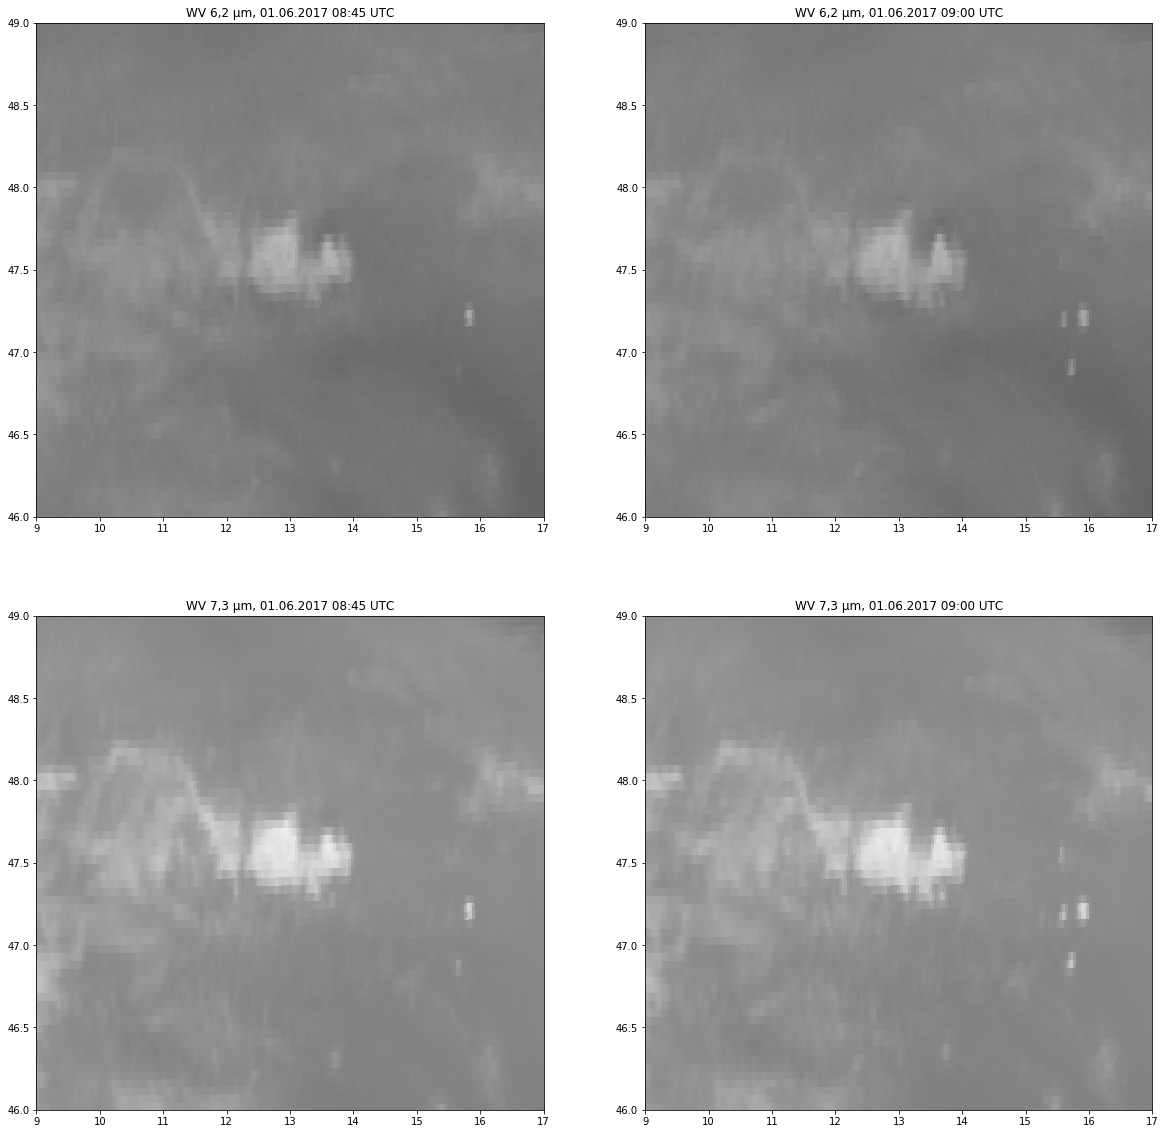

In [17]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
axs=ax.ravel()
axs[0].pcolormesh(slon,slat,s0['WV_062'],vmin=200,vmax=260,cmap='gray_r')
axs[0].set_title("WV 6,2 µm, {}".format(t0.strftime("%d.%m.%Y %H:%M UTC")))
axs[0].set_xlim(9,17)
axs[0].set_ylim(46,49)
axs[1].pcolormesh(slon,slat,s1['WV_062'],vmin=200,vmax=260,cmap='gray_r')
axs[1].set_title("WV 6,2 µm, {}".format(t1.strftime("%d.%m.%Y %H:%M UTC")))
axs[1].set_xlim(9,17)
axs[1].set_ylim(46,49)
axs[2].pcolormesh(slon,slat,s0['WV_073'],vmin=210,vmax=300,cmap='gray_r')
axs[2].set_title("WV 7,3 µm, {}".format(t0.strftime("%d.%m.%Y %H:%M UTC")))
axs[2].set_xlim(9,17)
axs[2].set_ylim(46,49)
axs[3].pcolormesh(slon,slat,s1['WV_073'],vmin=210,vmax=300,cmap='gray_r')
axs[3].set_title("WV 7,3 µm, {}".format(t1.strftime("%d.%m.%Y %H:%M UTC")))
axs[3].set_xlim(9,17)
axs[3].set_ylim(46,49)

In [18]:
wv62_0_shift_x = np.roll(s0['WV_062'],1,axis=1)
wv62_0_shift_y= np.roll(s0['WV_062'],1,axis=0)
wv73_0_shift_x = np.roll(s0['WV_073'],1,axis=1)
wv73_0_shift_y= np.roll(s0['WV_073'],1,axis=0)

wv62_1_shift_x = np.roll(s1['WV_062'],1,axis=1)
wv62_1_shift_y= np.roll(s1['WV_062'],1,axis=0)
wv73_1_shift_x = np.roll(s1['WV_073'],1,axis=1)
wv73_1_shift_y= np.roll(s1['WV_073'],1,axis=0)

In [66]:
ir108_0_shift_x = np.roll(s0['IR_108'],1,axis=1)
ir108_1_shift_x = np.roll(s1['IR_108'],1,axis=1)
ir108_0_shift_y = np.roll(s0['IR_108'],1,axis=0)
ir108_1_shift_y = np.roll(s1['IR_108'],1,axis=0)

ir120_0_shift_x = np.roll(s0['IR_120'],1,axis=1)
ir120_1_shift_x = np.roll(s1['IR_120'],1,axis=1)
ir120_0_shift_y = np.roll(s0['IR_120'],1,axis=0)
ir120_1_shift_y = np.roll(s1['IR_120'],1,axis=0)

In [19]:
vx_62 = ((wv62_0_shift_x - s0['WV_062']) - (wv62_1_shift_x - s1['WV_062'])) / (s0['WV_062'] - 273)
vy_62 = ((wv62_0_shift_y - s0['WV_062']) - (wv62_1_shift_y - s1['WV_062'])) / (s0['WV_062'] - 273)
vz_62 = ((s0['WV_062'] - s1['WV_062'])) / (s0['WV_062'] - 273)

In [20]:
v62 = np.stack((vx_62,vy_62,vz_62))

In [21]:
vx_73 = ((wv73_0_shift_x - s0['WV_073']) - (wv73_1_shift_x - s1['WV_073'])) / (s0['WV_073'] - 273)
vy_73 = ((wv73_0_shift_y - s0['WV_073']) - (wv73_1_shift_y - s1['WV_073'])) / (s0['WV_073'] - 273)
vz_73 = ((s0['WV_073'] - s1['WV_073'])) / (s0['WV_073'] - 273)

In [22]:
v73 = np.stack((vx_73,vy_73,vz_73))

In [23]:
nusv = np.cross(v62,v73,axis=0)

In [24]:
nus = np.sqrt(nusv[0]**2 + nusv[1]**2 + nusv[2]**2)

In [25]:
cmap_nus =  mpl.colors.LinearSegmentedColormap.from_list('nus', ['#ffffff',
                                                                 '#eeeee0',
                                                                 '#ffa500',
                                                                 '#ff0000',
                                                                 '#00ffff',
                                                                 '#0000ff',
                                                                 '#ffff00',
                                                                 '#00ff00'], gamma = 1, N = 8)

(46, 49)

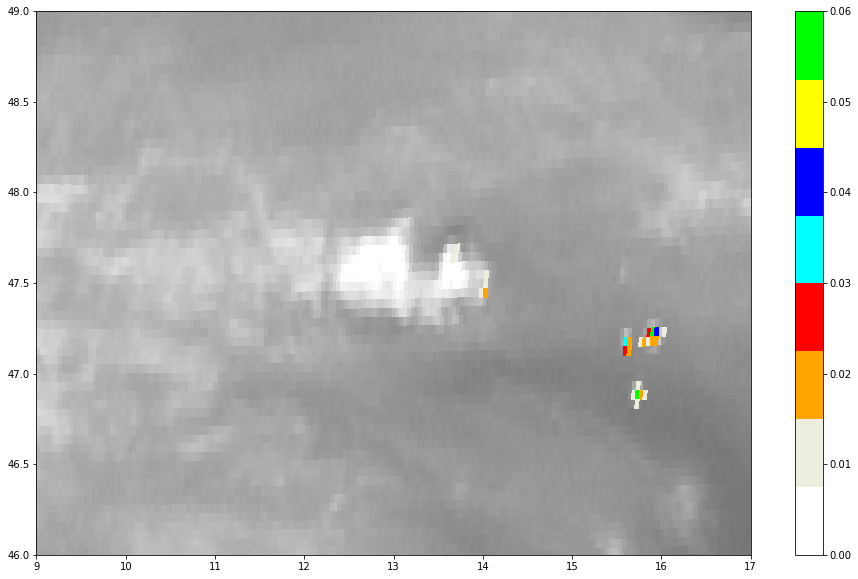

In [26]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.pcolormesh(slon,slat,s1['WV_062'],vmin=220,vmax=250,cmap='gray_r')
n_plot = ax.pcolormesh(slon,slat,np.ma.masked_less(nus,0.01),vmin=0,vmax=0.06,cmap=cmap_nus)
plt.colorbar(n_plot)
ax.set_xlim(9,17)
ax.set_ylim(46,49)

In [29]:
vx_108 = ((ir108_0_shift_x - s0['IR_108']) - (ir108_1_shift_x - s1['IR_108'])) / (s0['IR_108'] - 273)
vy_108 = ((ir108_0_shift_y - s0['IR_108']) - (ir108_1_shift_y - s1['IR_108'])) / (s0['IR_108'] - 273)
vz_108 = ((s0['IR_108'] - s1['IR_108'])) / (s0['IR_108'] - 273)

In [30]:
v108 = np.stack((vx_108,vy_108,vz_108))

In [67]:
vx_120 = ((ir120_0_shift_x - s0['IR_120']) - (ir120_1_shift_x - s1['IR_120'])) / (s0['IR_120'] - 273)
vy_120 = ((ir120_0_shift_y - s0['IR_120']) - (ir120_1_shift_y - s1['IR_120'])) / (s0['IR_120'] - 273)
vz_120 = ((s0['IR_120'] - s1['IR_120'])) / (s0['IR_120'] - 273)

In [68]:
v120 = np.stack((vx_120,vy_120,vz_120))

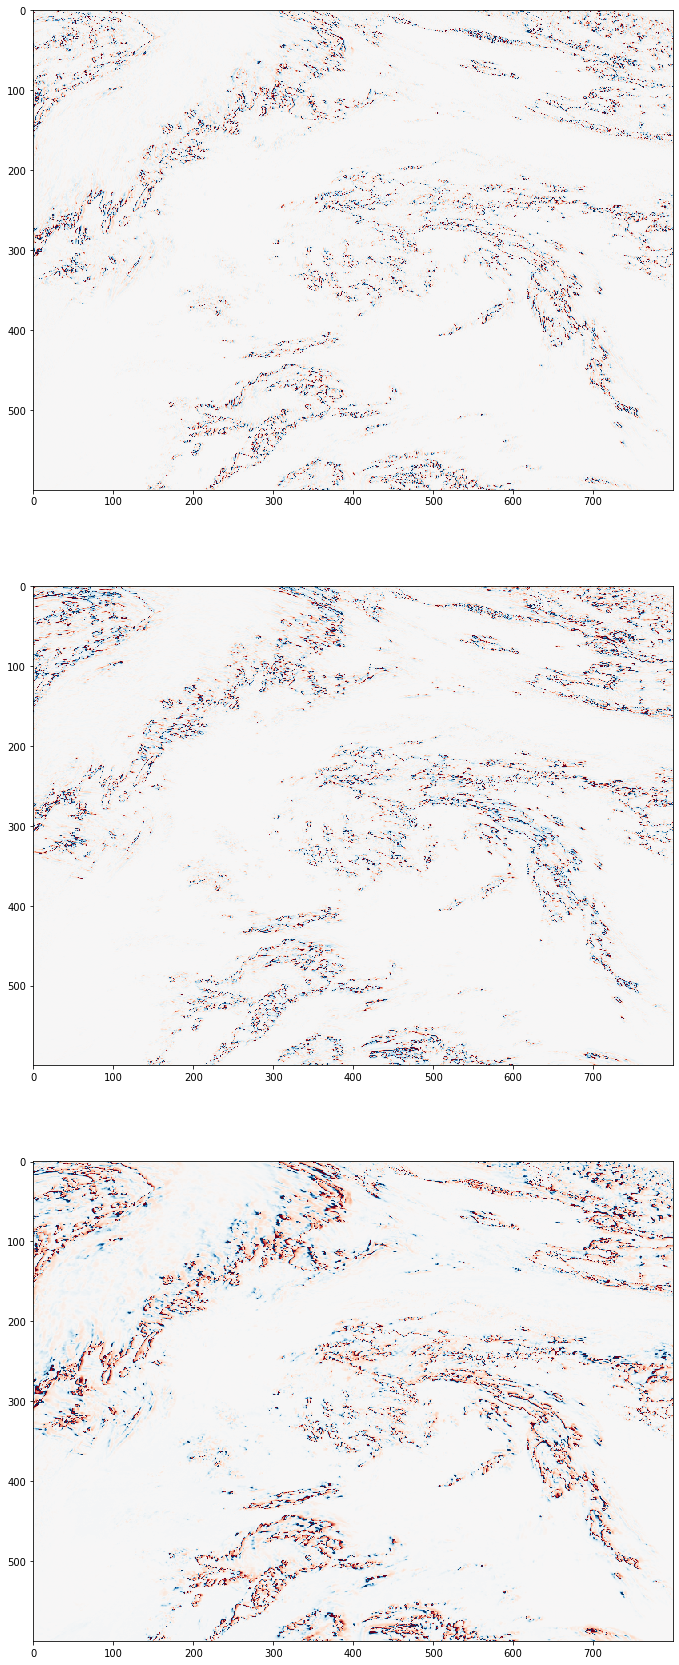

In [54]:
fig,ax = plt.subplots(3,1,figsize=(16,30))
ax[0].imshow(vx_108,vmin=-5,vmax=5,cmap='RdBu_r')
ax[1].imshow(vy_108,vmin=-5,vmax=5,cmap='RdBu_r')
ax[2].imshow(vz_108,vmin=-5,vmax=5,cmap='RdBu_r')

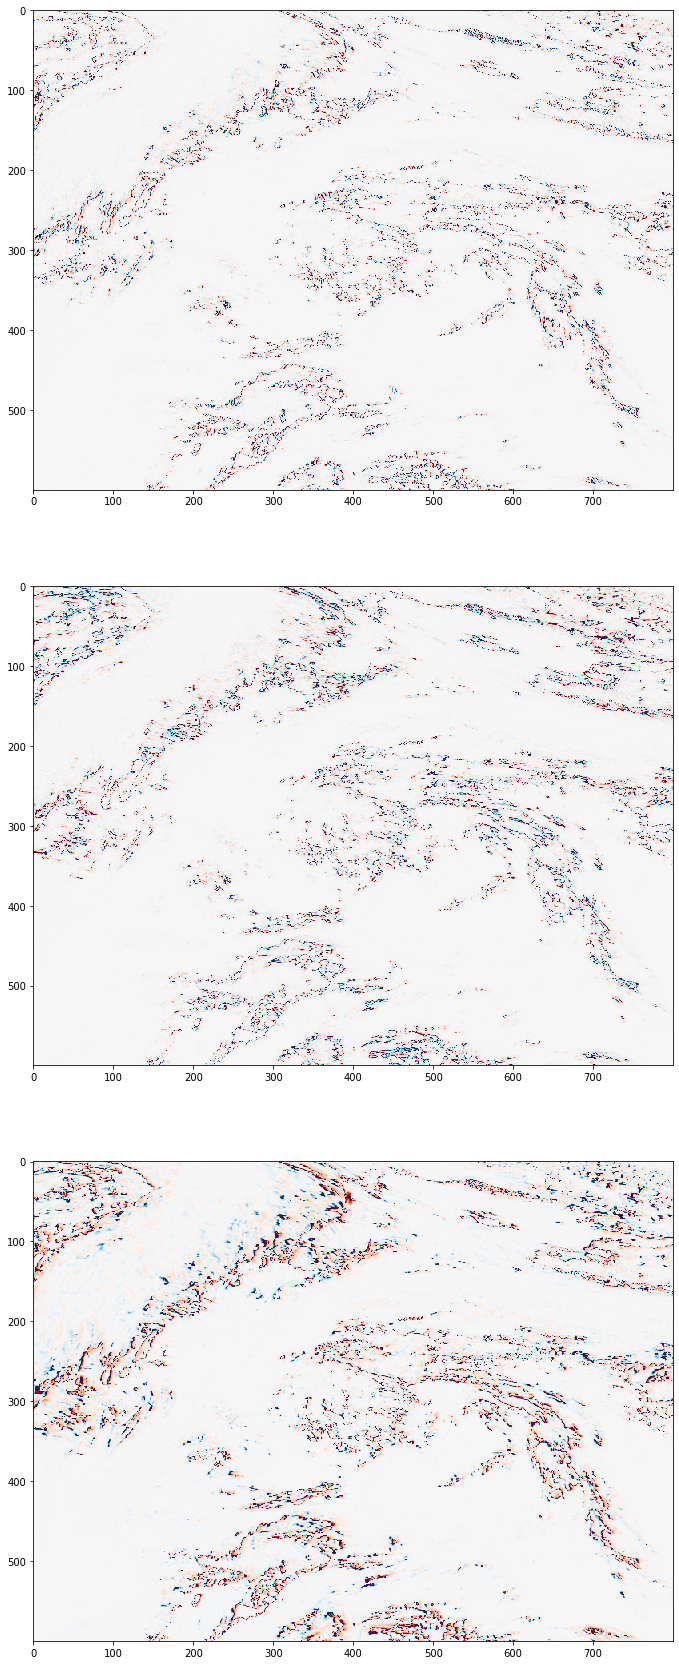

In [69]:
fig,ax = plt.subplots(3,1,figsize=(16,30))
ax[0].imshow(vx_120,vmin=-5,vmax=5,cmap='RdBu_r')
ax[1].imshow(vy_120,vmin=-5,vmax=5,cmap='RdBu_r')
ax[2].imshow(vz_120,vmin=-5,vmax=5,cmap='RdBu_r')

In [70]:
nisv = np.cross(v120,v108,axis=0)

In [71]:
nis = np.sqrt(nisv[0]**2 + nisv[1]**2 + nisv[2]**2)

(46, 49)

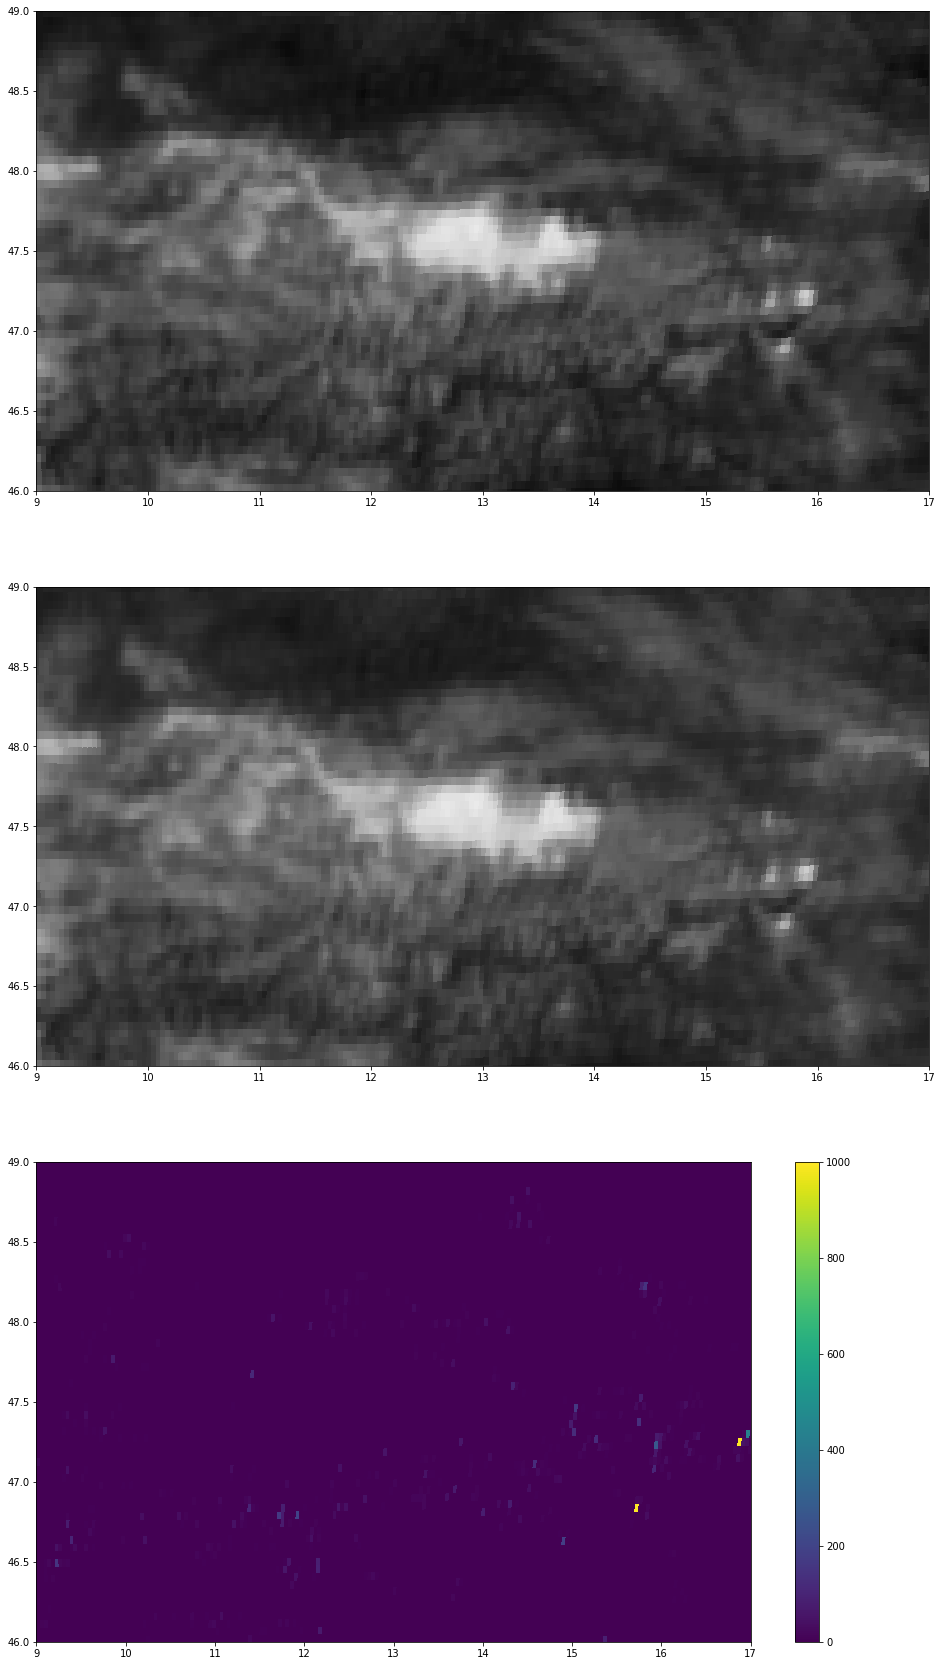

In [72]:
fig,ax = plt.subplots(3,1,figsize=(16,30))
ax[0].pcolormesh(slon,slat,s1['IR_108'],vmin=210,vmax=300,cmap='gray_r')
ax[0].set_xlim(9,17)
ax[0].set_ylim(46,49)
ax[1].pcolormesh(slon,slat,s1['IR_120'],vmin=210,vmax=300,cmap='gray_r')
ax[1].set_xlim(9,17)
ax[1].set_ylim(46,49)
n_plot = ax[2].pcolormesh(slon,slat,nis,vmin=0,vmax=1000)
plt.colorbar(n_plot)
ax[2].set_xlim(9,17)
ax[2].set_ylim(46,49)